# Submitted By: SANTOSHI PATNAIK( DS-2306)

# 7. Census Income

## Project Description: 

In [1]:
import pandas as pd                              # importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## EDA

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.shape

(32560, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Replacing the '?' with Nan in data set

In [7]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [8]:
df=df.replace(' ?',np.NaN)

In [9]:
df.duplicated().any()

True

In [10]:
df.drop_duplicates(keep='last', inplace=True)

#### we can see some duplicate data present in the data set.. so we have to drop those rows

In [11]:
df.shape

(32536, 15)

In [12]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

<AxesSubplot:>

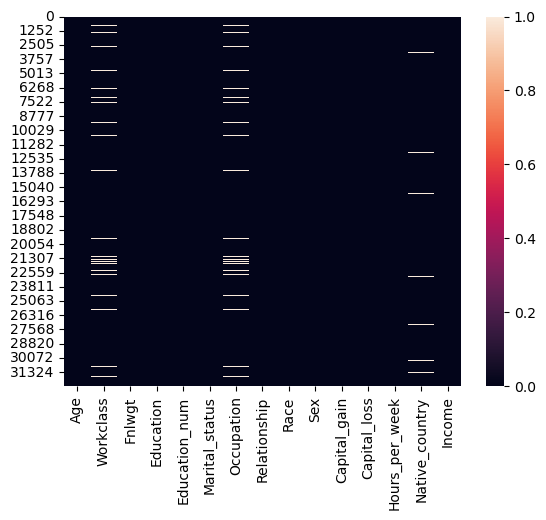

In [13]:
## Visualizing through heat map:
sns.heatmap(df.isnull())

Here the null values are arised as we replaced the "?" with Nan.. Now we have to replace the nana values with mean or mode according to the categorical or numerical column

Comments:

we can see the "Workclass", "Occupation","Native_country" only these columns contains Nan values which are Categorical columns, so we have to replace the Nan values by Mode of the data in that columns

In [14]:
df["Workclass"]=df["Workclass"].fillna(df["Workclass"].mode()[0])
df["Occupation"]=df["Occupation"].fillna(df["Occupation"].mode()[0])
df["Native_country"]=df["Native_country"].fillna(df["Native_country"].mode()[0])

Checking for Missing Values After replacing the "?"

In [15]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

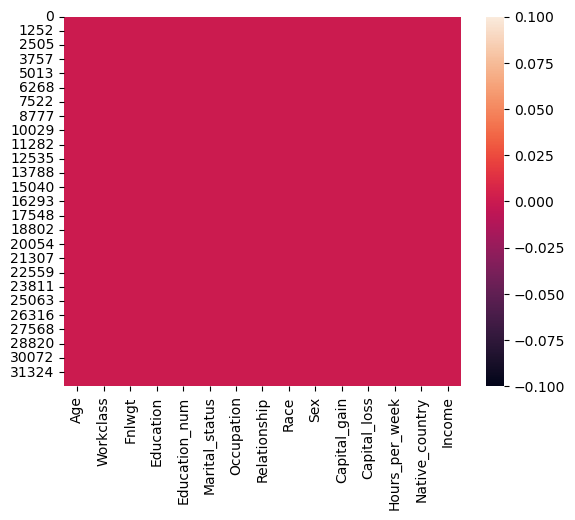

In [16]:
## Visualizing through heatmap:
sns.heatmap(df.isnull())

###### We can see now all the null values are replaced and no missing values present in data set

#### Separating Categorical and numerical columns:

In [17]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)    

categorical columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [18]:
#for numerical column:
numeric_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numeric_col.append(i)
print("numerical column:",numeric_col)        

numerical column: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


#### Statistical Description:

In [19]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Observation:
1. Count of all the columns are same which shows there is no missing value present in the dataset.
2. In "Capital_gain" and "Capital_loss" column data is highly skewed.( right skewed)i.e. mean greater thean median(50%)
3. in remaining columns the data is slightly skewed or nearly equal to normal distribution in some columns
4. we can see from the above description that there is a considerable gap between 75% and max value , which shows outliers present in the dataset

## Data visualization:

## Univariate Analysis:

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


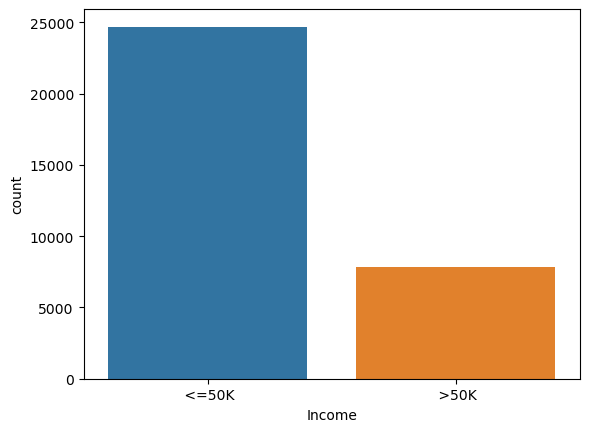

In [20]:
#visualizing the count of "Income" column:
p=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

#### Comments:
-> from the above count plot we can observe the number of persons whose income less than 50k are more compared to that of number of people getting more than 50k
-> Number of persons whose income less than 50k is 24697
-> number of counts whose income >50k is 7839

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


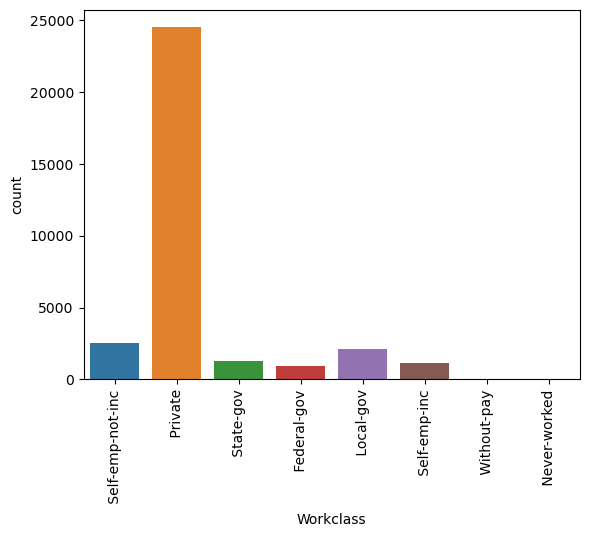

In [21]:
# Visualizing the "workclass"
p=sns.countplot(x='Workclass',data=df)
plt.xticks(rotation=90)
print(df['Workclass'].value_counts())


##### Comments:
-> From above we can observe, maximum number of peoples working in private sector only, self employed, local-gov.

-> people comming under "Never-Worked" and " Without-pay" jone are very less


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


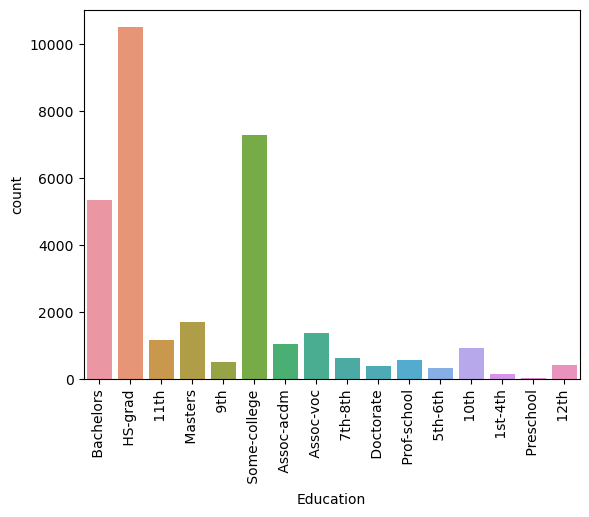

In [22]:
#visualizing the count of "Education" column:
p=sns.countplot(x='Education',data=df)
plt.xticks(rotation=90)
print(df['Education'].value_counts())


##### Comments:
-> Number of persons completed HS-grad are maximum, the count is 10494
-> followed by Some collages, Bacholers and masters etc
-> the count is least in case of people having education "Preschool". Here the count is 50 only

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


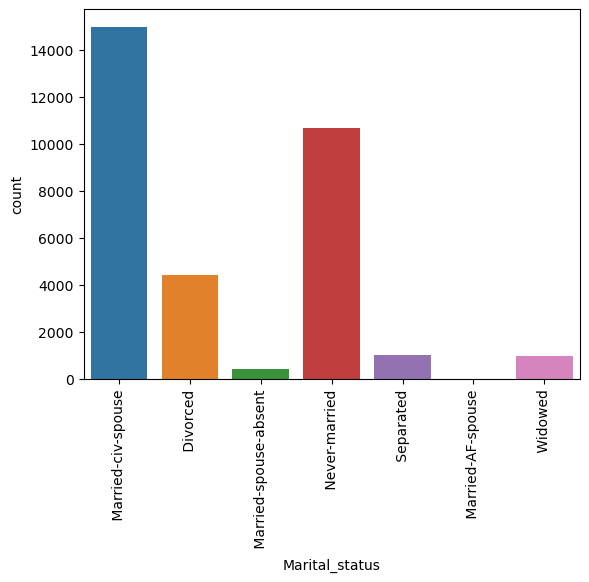

In [23]:
#visualizing the count of "Marital_status" column:
p=sns.countplot(x='Marital_status',data=df)
plt.xticks(rotation=90)
print(df['Marital_status'].value_counts())

#### Comments:
-> maximum number ofcount are of "Married-civ-spouce", followed by " Never Married", Then "Divorced"
so these category people are more involved in different segment of earning category.
->in remaining category the count is less.
->"Married-AF-Spouce" count are the least

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


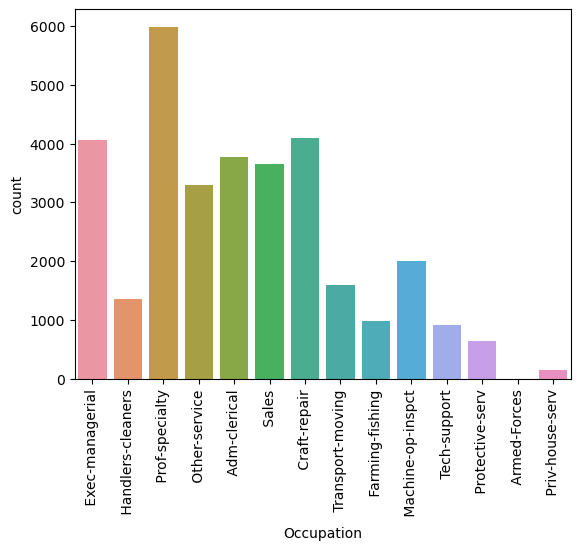

In [24]:
#visualizing the count of "Occupation" column:
p=sns.countplot(x='Occupation',data=df)
plt.xticks(rotation=90)
print(df['Occupation'].value_counts())

##### Comments:
-> In Arme Forces very less number of peoples are working
-> maximum number of peoples are working under "Prof-speciality" job category
-> the count is almost similar in case of "Adm clarical","exec-managerical","sales","Craft repair" category

 Male      21774
 Female    10762
Name: Sex, dtype: int64


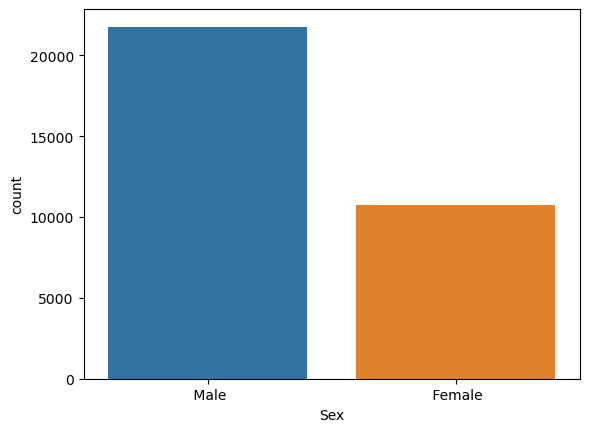

In [25]:
#visualizing the count of "Sex" column:
p=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

##### Comments:
-> male working memebrs are higher than female workers

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

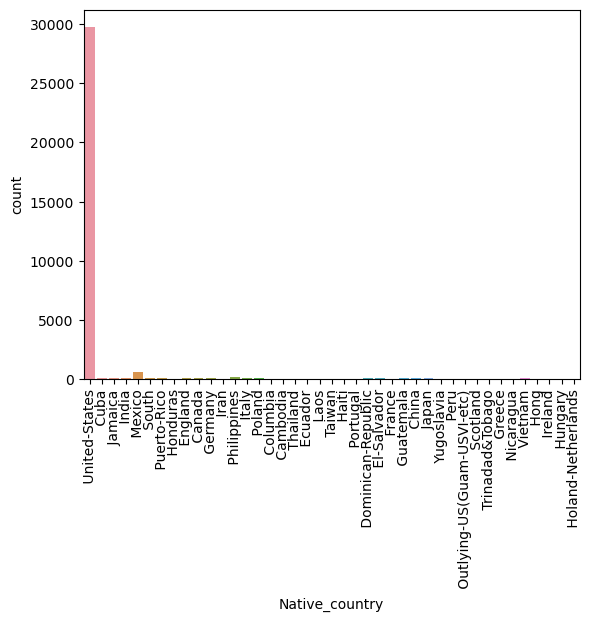

In [26]:
#visualizing the count of "Native_country" column:
p=sns.countplot(x='Native_country',data=df)
plt.xticks(rotation=90)
print(df['Native_country'].value_counts())

->> most of the people registered in this data set are from "United States" only, next a lesser count in maxico.. in remaining its very very less

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


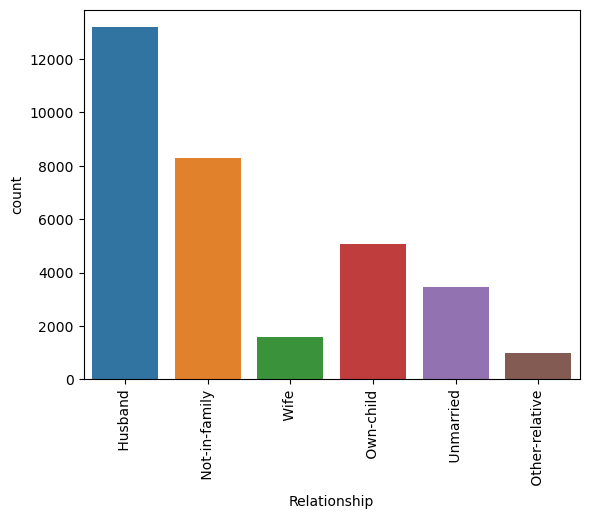

In [27]:
#visualizing the count of "Relationship" column:
p=sns.countplot(x='Relationship',data=df)
plt.xticks(rotation=90)
print(df['Relationship'].value_counts())

##### Comments:
-> In most of the cases families are dependent on Husband's Income source
-> The count of people earning  who are not in family are also high
-> The Count for "wife" and other relative are least

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


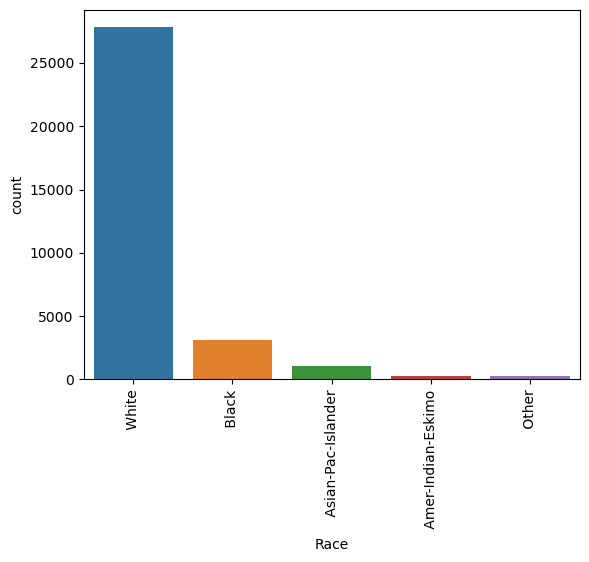

In [28]:
#visualizing the count of "Race" column:
p=sns.countplot(x='Race',data=df)
plt.xticks(rotation=90)
print(df['Race'].value_counts())

#### Comments:
-> "White" category count is highly dominating compared to other race category.


## Bivariate Analysis:

<function matplotlib.pyplot.show(close=None, block=None)>

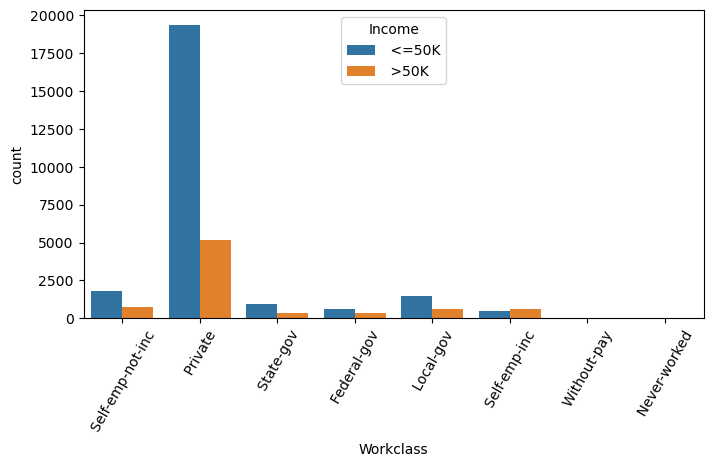

In [29]:
# Work class vs Income:
plt.figure(figsize=(8,4))
sns.countplot(x="Workclass", hue="Income", data=df)
plt.xticks(rotation=60)
plt.show

##### Comments:
-> Number of people working in Private sector are more.. as well as the persons earning  >50k are also more in private sector only
->in other segments number of people earning > 50k is almost similar

<function matplotlib.pyplot.show(close=None, block=None)>

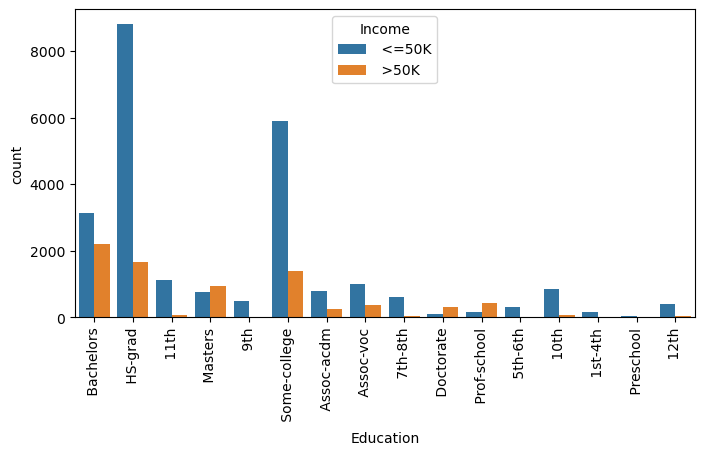

In [30]:
# Education vs Income:
plt.figure(figsize=(8,4))
sns.countplot(x="Education", hue="Income", data=df)
plt.xticks(rotation=90)
plt.show

#### Comments:
-> percentage of people earning >50k is more in people completed Bachelors degree category
->folowed by Hs-grad and some collage category
-> Surprisingly higher masters and Doctorate degree employees earning >50 k percentage is lesser compared to bachelors

<function matplotlib.pyplot.show(close=None, block=None)>

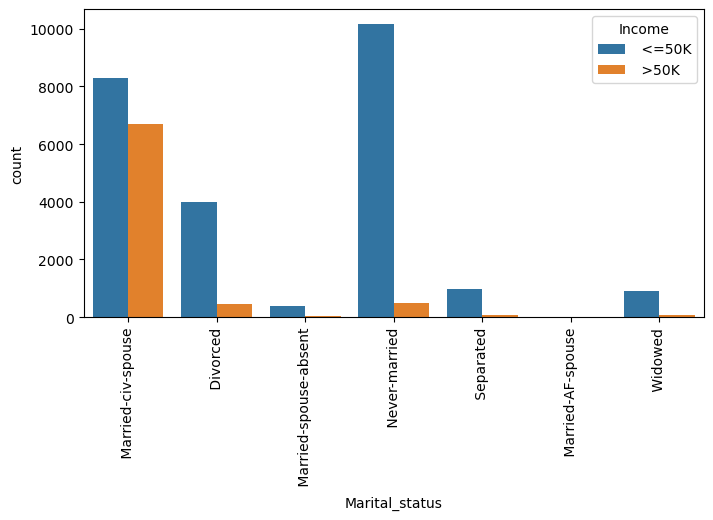

In [31]:
# Marital_status class vs Income:
plt.figure(figsize=(8,4))
sns.countplot(x="Marital_status", hue="Income", data=df)
plt.xticks(rotation=90)
plt.show

### Comments:
-> in Married-civ-spouce category income is higher

<function matplotlib.pyplot.show(close=None, block=None)>

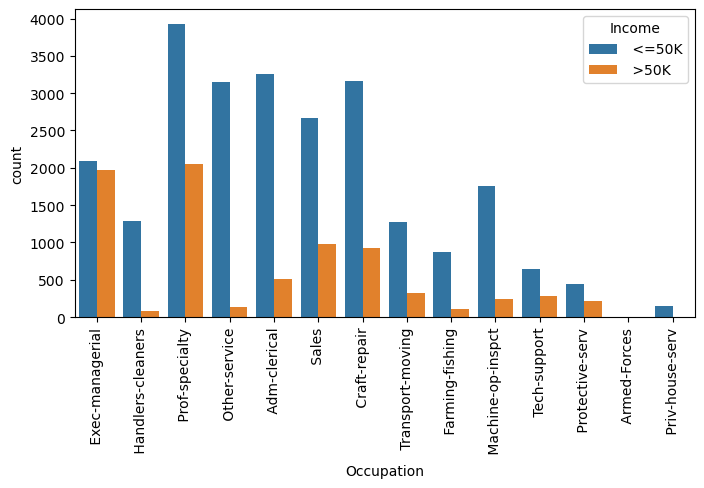

In [32]:
# Occupation vs Income:
plt.figure(figsize=(8,4))
sns.countplot(x="Occupation", hue="Income", data=df)
plt.xticks(rotation=90)
plt.show

##### comments:
-> in 'Exec managerial' an "prof-speciality" category earning is higher compared to other occupation

<function matplotlib.pyplot.show(close=None, block=None)>

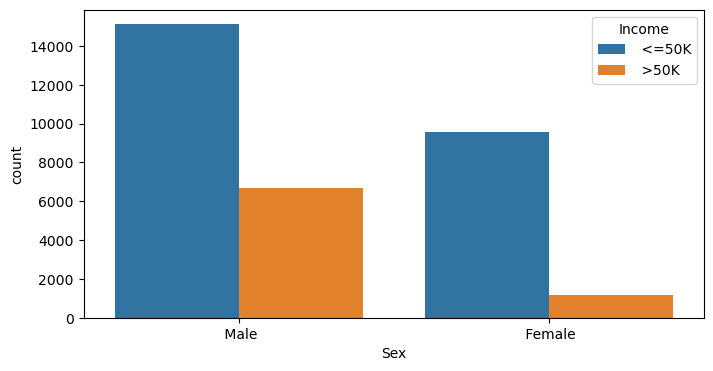

In [33]:
# Sex vs Income:
plt.figure(figsize=(8,4))
sns.countplot(x="Sex", hue="Income", data=df)
plt.show

#### Comments:
-> more number of males are earning >50k compared to females

<function matplotlib.pyplot.show(close=None, block=None)>

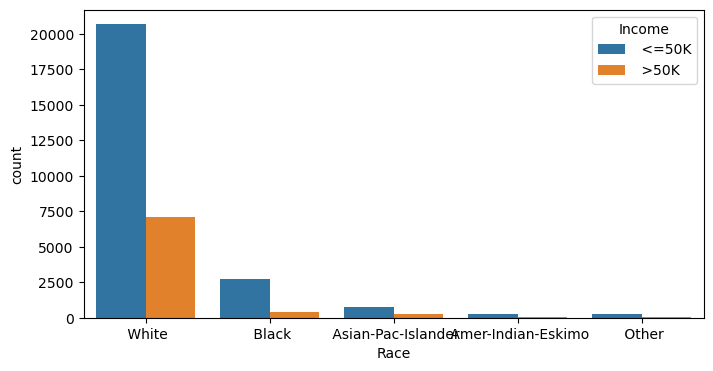

In [34]:
# Race vs Income:
plt.figure(figsize=(8,4))
sns.countplot(x="Race", hue="Income", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

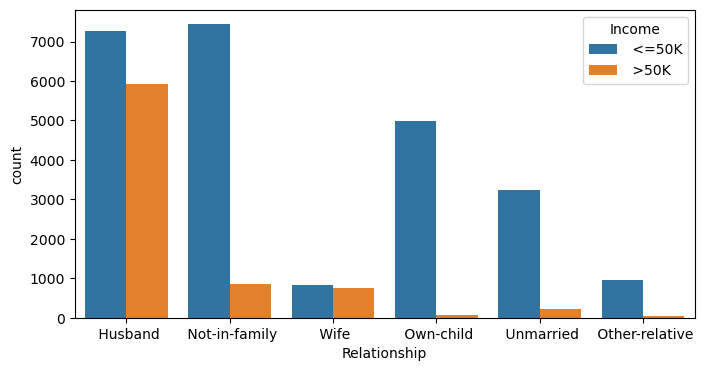

In [35]:
# Relationship vs Income:
plt.figure(figsize=(8,4))
sns.countplot(x="Relationship", hue="Income", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

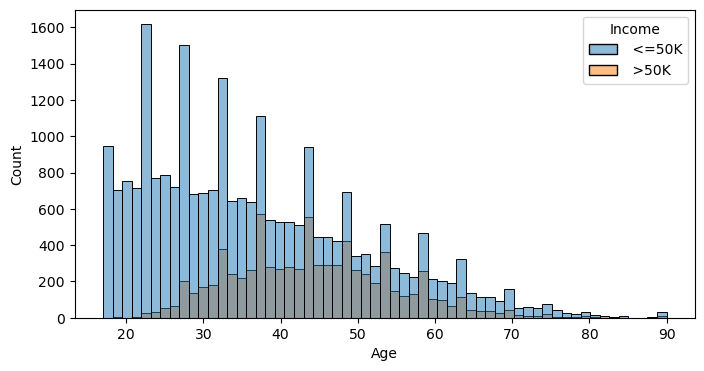

In [36]:
# Age vs Income:
plt.figure(figsize=(8,4))
sns.histplot(x="Age", hue="Income", data=df)
plt.show

#### Comments:
-> in 35-50 age group income >50 k is maximum
-> in 20-30 age group and old age groups the income is again less

<function matplotlib.pyplot.show(close=None, block=None)>

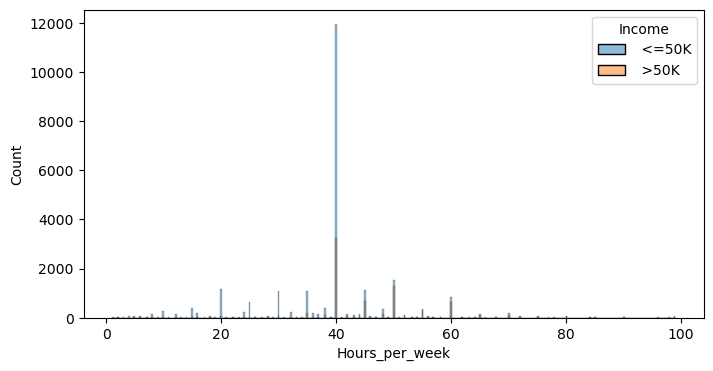

In [37]:
# Capital_gain vs Income:
plt.figure(figsize=(8,4))
sns.histplot(x="Hours_per_week", hue="Income", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

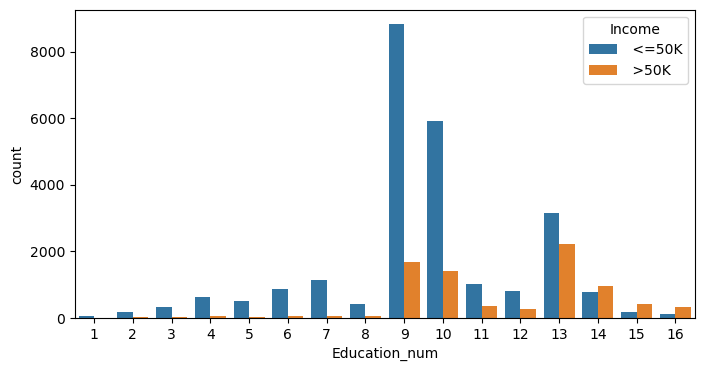

In [38]:
# Education_num vs Income:
plt.figure(figsize=(8,4))
sns.countplot(x="Education_num", hue="Income", data=df)
plt.show

## Pair plot:

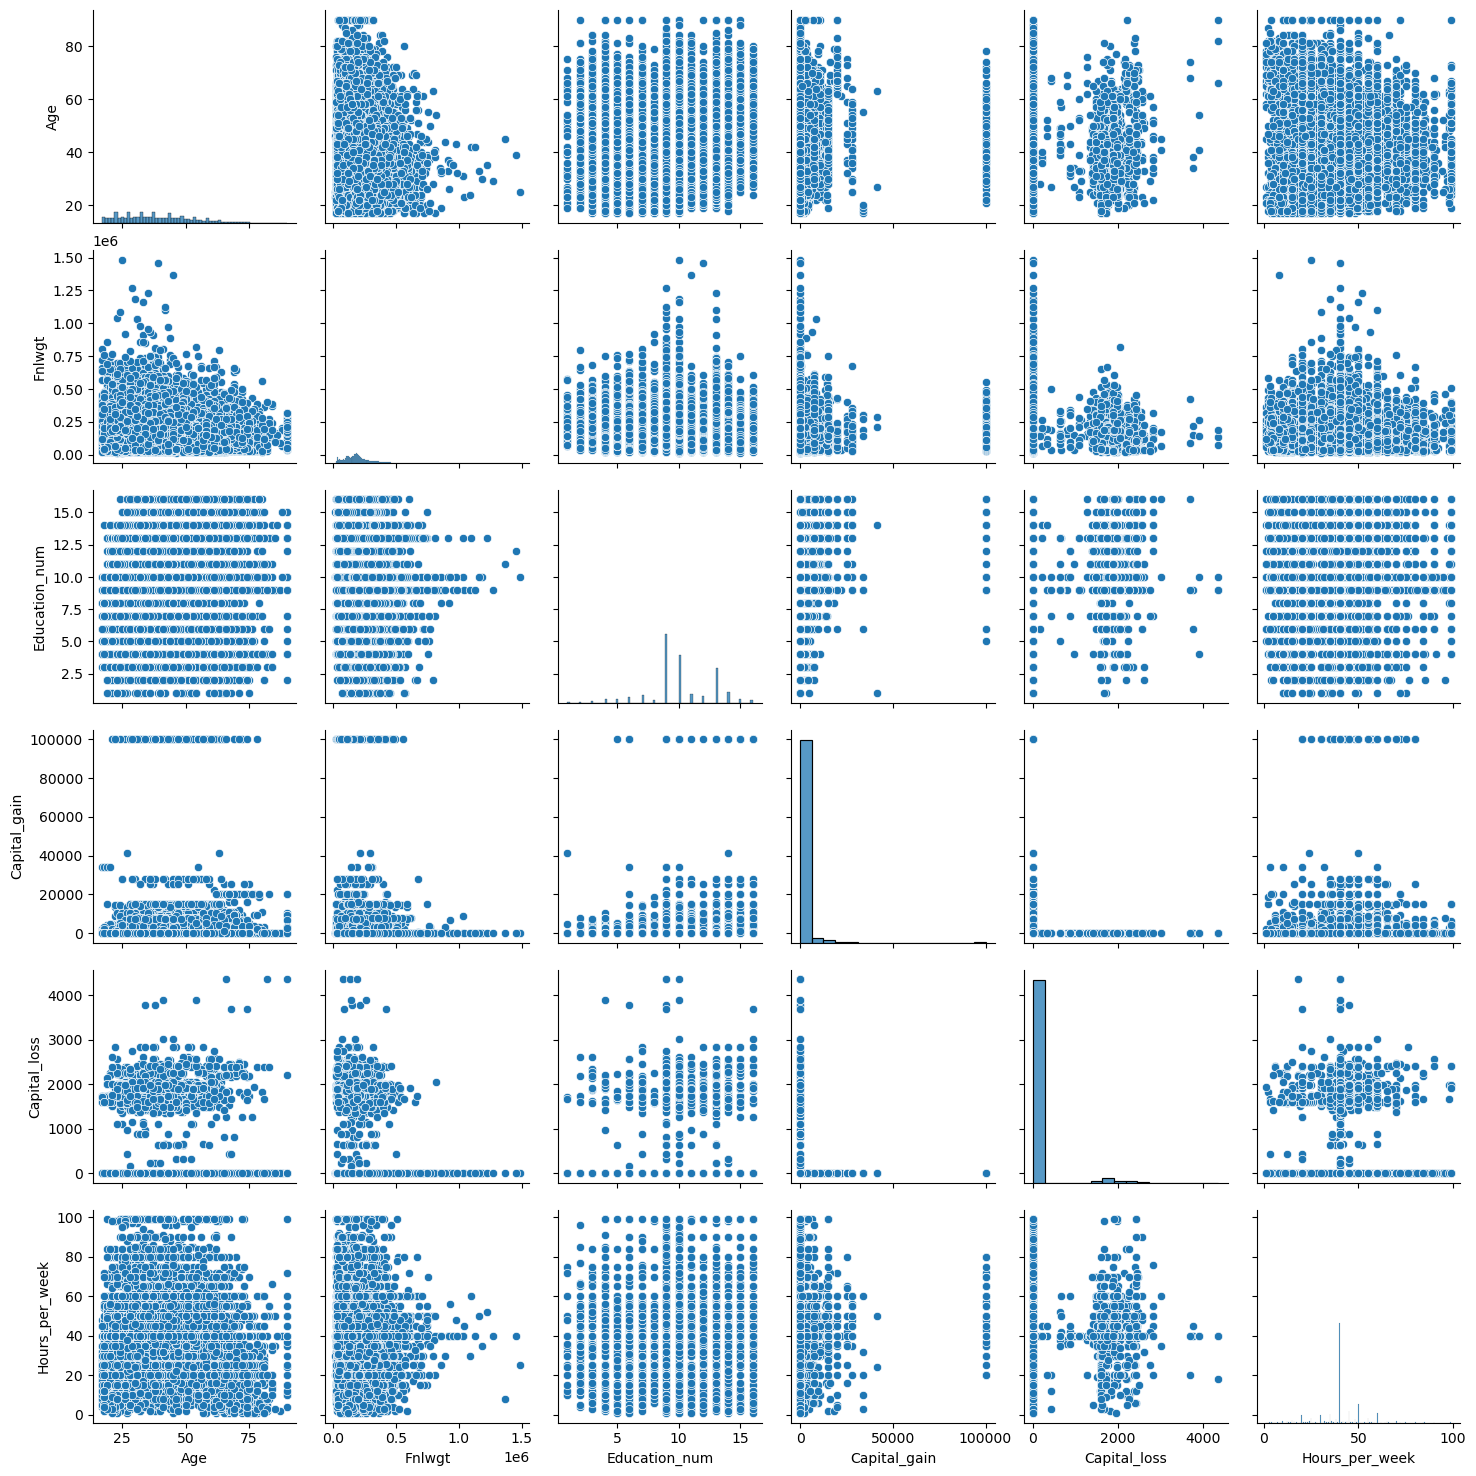

In [39]:
sns.pairplot(df)

## Feature Engineering:

In [40]:
# Encoding Categorical Columns:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in categorical_col:
    df[i]=OE.fit_transform(df[i].values.reshape(-1,1))    
df       

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


In [41]:
df.astype(float)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50.0,5.0,83311.0,9.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,13.0,38.0,0.0
1,38.0,3.0,215646.0,11.0,9.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,38.0,0.0
2,53.0,3.0,234721.0,1.0,7.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,40.0,38.0,0.0
3,28.0,3.0,338409.0,9.0,13.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,40.0,4.0,0.0
4,37.0,3.0,284582.0,12.0,14.0,2.0,3.0,5.0,4.0,0.0,0.0,0.0,40.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,3.0,257302.0,7.0,12.0,2.0,12.0,5.0,4.0,0.0,0.0,0.0,38.0,38.0,0.0
32556,40.0,3.0,154374.0,11.0,9.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,40.0,38.0,1.0
32557,58.0,3.0,151910.0,11.0,9.0,6.0,0.0,4.0,4.0,0.0,0.0,0.0,40.0,38.0,0.0
32558,22.0,3.0,201490.0,11.0,9.0,4.0,0.0,3.0,4.0,1.0,0.0,0.0,20.0,38.0,0.0


## Outlier Detection:

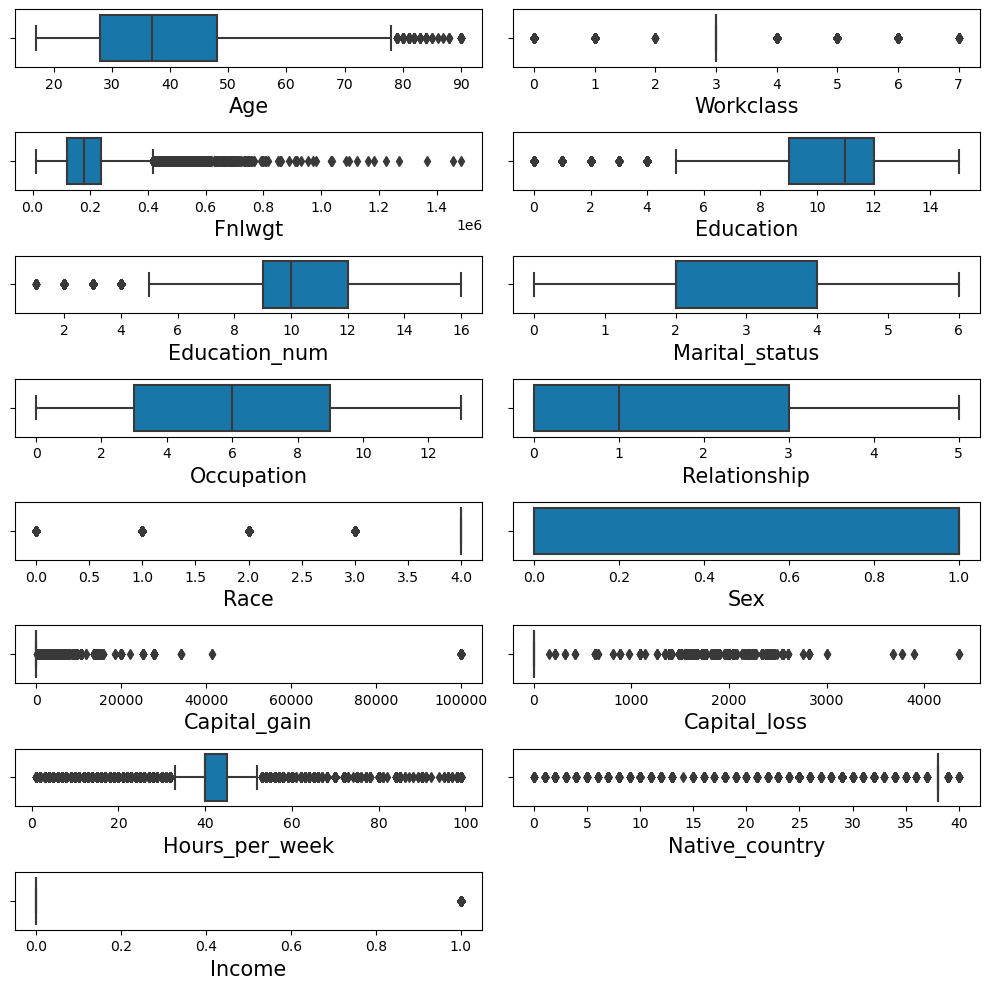

In [42]:
# checking for outliers
plt.figure(figsize=(10,10),facecolor="white")
plotnum=1
for i in df.columns:
    if plotnum<=16:
        p=plt.subplot(8,2,plotnum)
        sns.boxplot(df[i],palette='winter_r')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
        plotnum+=1
plt.tight_layout()    

In [43]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [44]:
#removing outliers from numerical columns:
#z-score method:
from scipy.stats import zscore
out_features=df[['Fnlwgt', 'Education', 'Education_num','Capital_gain','Capital_loss','Hours_per_week']]
z=np.abs(zscore(out_features))
z

,Fnlwgt,Education,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,1.008703,0.335272,1.134817,0.145969,0.216747,2.222450
1,0.245008,0.181506,0.420646,0.145969,0.216747,0.035664
2,0.425720,2.402383,1.198377,0.145969,0.216747,0.035664
3,1.408036,0.335272,1.134817,0.145969,0.216747,0.035664
4,0.898091,0.439895,1.523683,0.145969,0.216747,0.035664
...,...,...,...,...,...,...
32555,0.639647,0.852050,0.745951,0.145969,0.216747,0.197648
32556,0.335469,0.181506,0.420646,0.145969,0.216747,0.035664
32557,0.358812,0.181506,0.420646,0.145969,0.216747,0.035664
32558,0.110897,0.181506,0.420646,0.145969,0.216747,1.655506


In [45]:
#threshold=3
np.where(z>3)

(array([    9,    22,    27, ..., 32493, 32500, 32506], dtype=int64),
 array([5, 4, 5, ..., 3, 5, 5], dtype=int64))

In [46]:
# we have to removethese rows which have outliers:
df1=df[(z<3).all(axis=1)]
df1.shape          # after removing outliers the data frame size

(29909, 15)

In [47]:
#originaldata frame size
df.shape

(32536, 15)

In [48]:
#data loss percentage:
print("data loss percentage",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage 8.074133267764937


###### The dataloss percentage is affordable so we can proceed

In [49]:
#checking for skewness present in the data:
df1.skew()

Age                0.568818
Workclass          0.091330
Fnlwgt             0.634959
Education         -0.942153
Education_num     -0.171888
Marital_status    -0.042980
Occupation         0.004523
Relationship       0.745449
Race              -2.438002
Sex               -0.680287
Capital_gain       4.943489
Capital_loss      29.702119
Hours_per_week    -0.358098
Native_country    -4.336707
Income             1.331831
dtype: float64

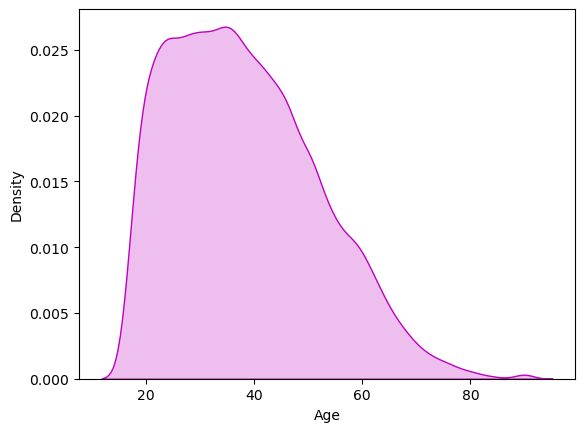

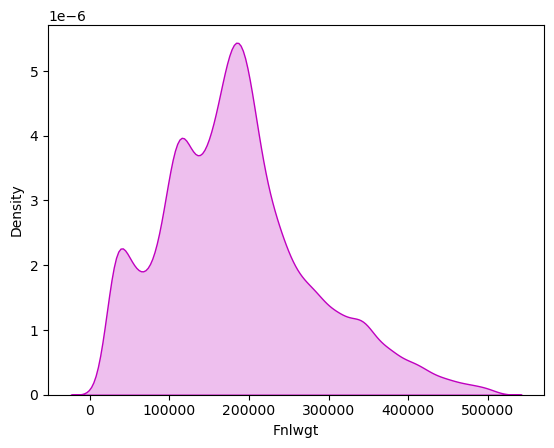

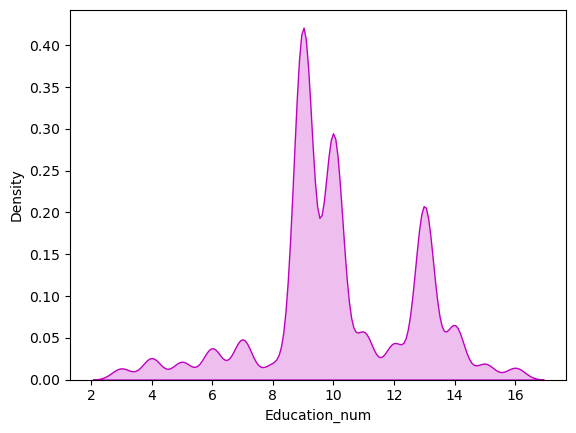

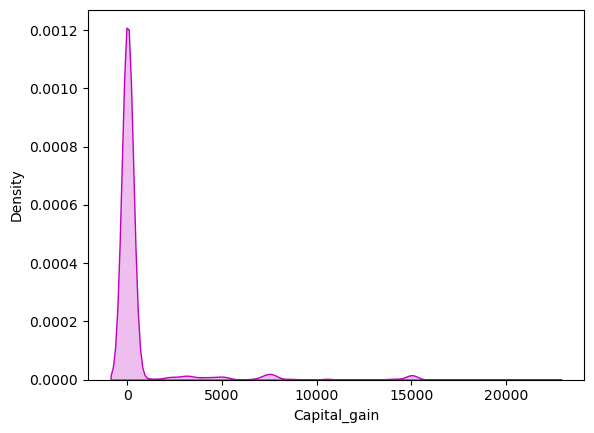

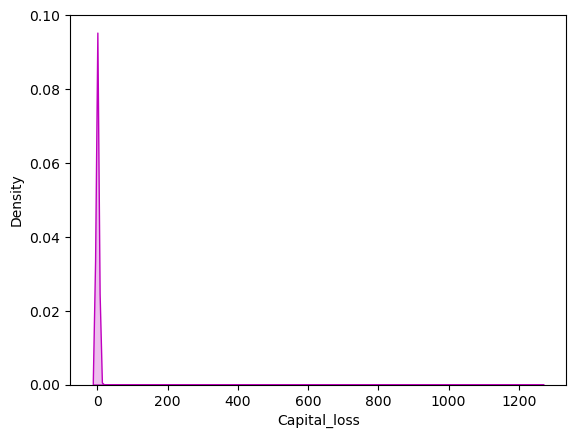

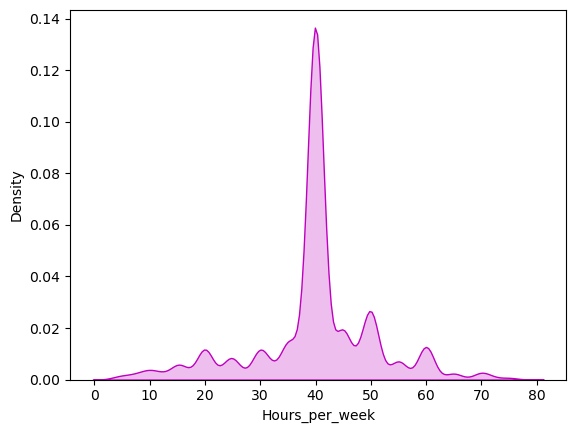

In [50]:
#visualizing the spreading of data
for i in numeric_col:
    sns.distplot(df1[i],color="m",kde_kws={"shade":True},hist=False)
    plt.show()

# Correlation matrix:

In [51]:
corr=df1.corr()
corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.033683,-0.075242,-0.009695,0.038232,-0.272344,-0.002039,-0.263816,0.028514,0.085205,0.131114,0.019968,0.078618,-0.002007,0.231924
Workclass,0.033683,1.000000,-0.023108,0.003289,-0.001082,-0.016038,0.008065,-0.057789,0.046073,0.069207,0.011564,-0.010146,0.026592,-0.001603,-0.007512
Fnlwgt,-0.075242,-0.023108,1.000000,-0.021618,-0.037809,0.027879,-0.002431,0.008344,-0.010182,0.028198,-0.002737,0.002603,-0.014690,-0.059776,-0.009264
Education,-0.009695,0.003289,-0.021618,1.000000,0.350924,-0.035462,-0.041586,-0.010538,0.014869,-0.029867,0.025541,-0.000938,0.057041,0.066117,0.072047
Education_num,0.038232,-0.001082,-0.037809,0.350924,1.000000,-0.059788,0.069465,-0.096076,0.028248,0.009104,0.154633,0.009477,0.151591,0.056992,0.318808
Marital_status,-0.272344,-0.016038,0.027879,-0.035462,-0.059788,1.000000,0.035582,0.184554,-0.065816,-0.123962,-0.068710,-0.013843,-0.196842,-0.015638,-0.194660
Occupation,-0.002039,0.008065,-0.002431,-0.041586,0.069465,0.035582,1.000000,-0.036647,-0.003362,0.050417,0.009530,-0.001861,-0.023502,-0.001366,0.030687
Relationship,-0.263816,-0.057789,0.008344,-0.010538,-0.096076,0.184554,-0.036647,1.000000,-0.116410,-0.576966,-0.090987,0.028821,-0.255402,-0.011216,-0.245256
Race,0.028514,0.046073,-0.010182,0.014869,0.028248,-0.065816,-0.003362,-0.116410,1.000000,0.089686,0.023903,0.001308,0.044892,0.115060,0.071609
Sex,0.085205,0.069207,0.028198,-0.029867,0.009104,-0.123962,0.050417,-0.576966,0.089686,1.000000,0.071367,-0.026317,0.232800,0.002395,0.209725


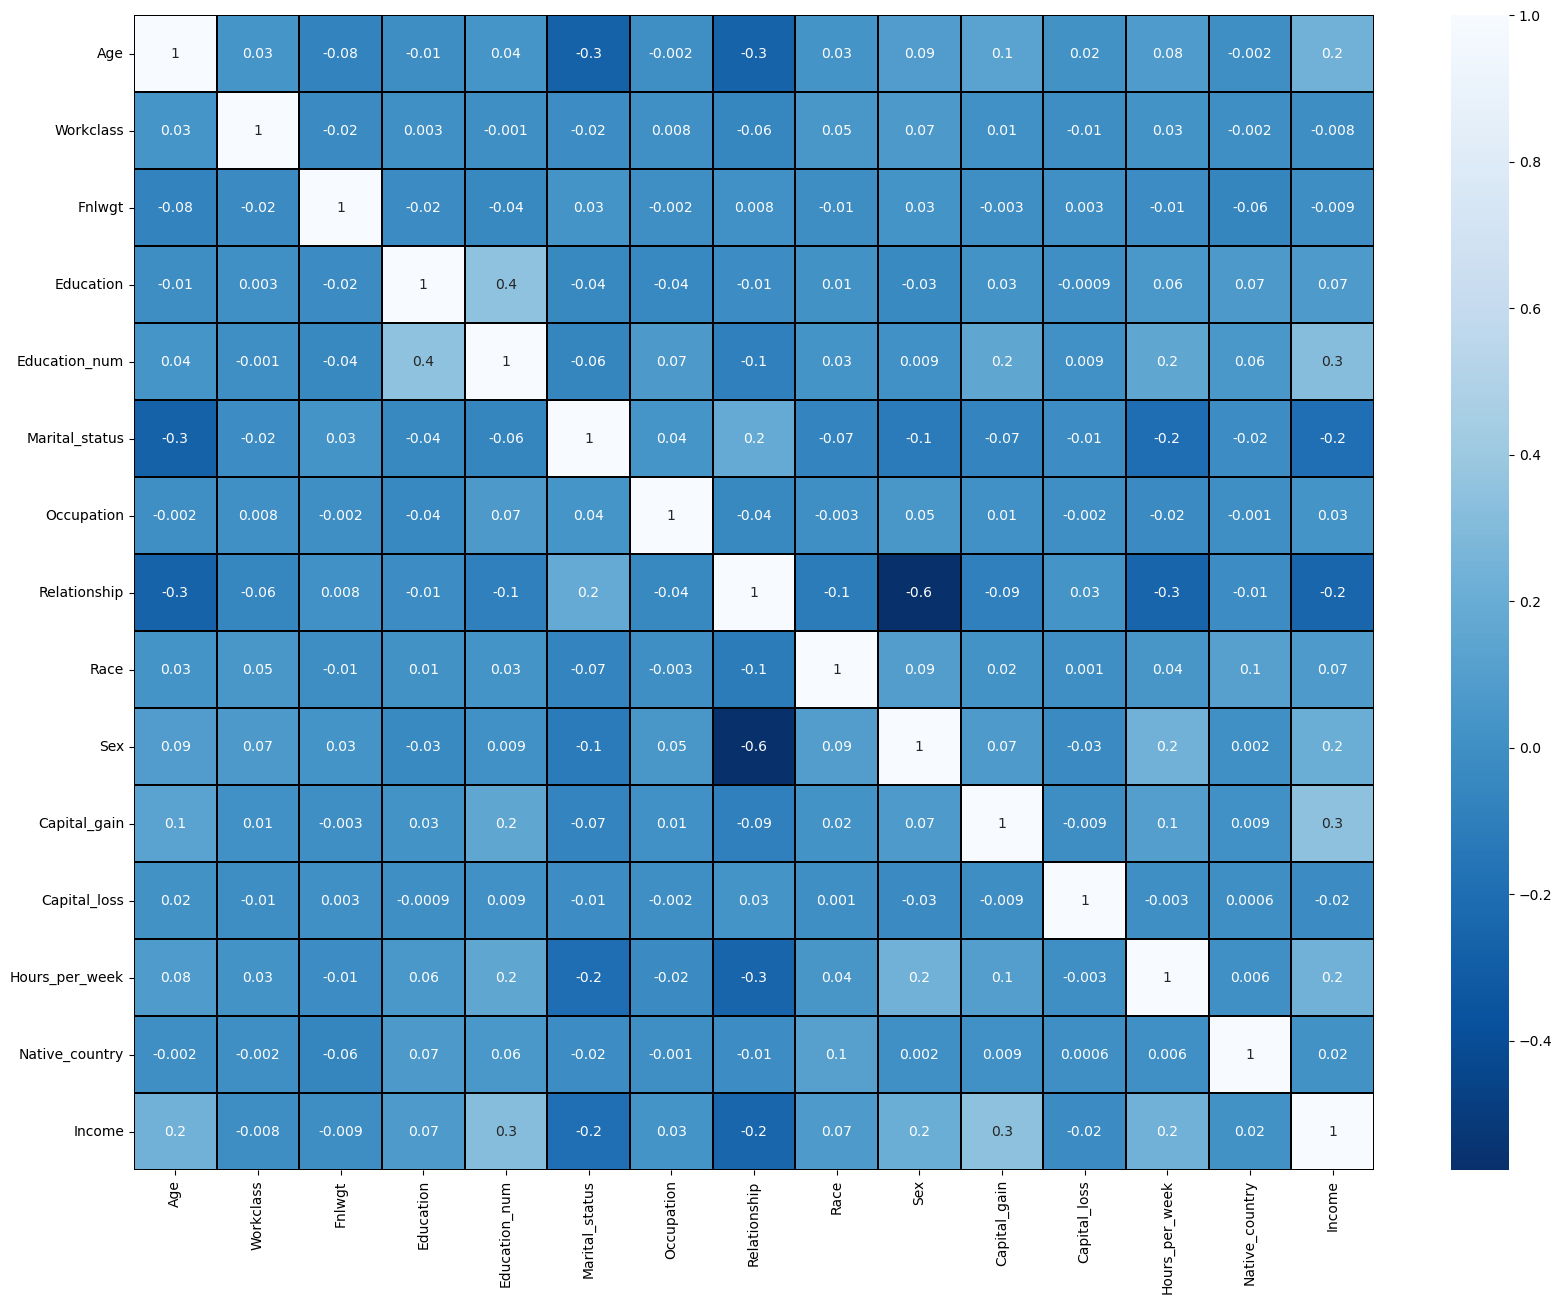

In [52]:
#visualizing the corelation matrix by using the heaatmap
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidth=0.1,fmt='0.1g',linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

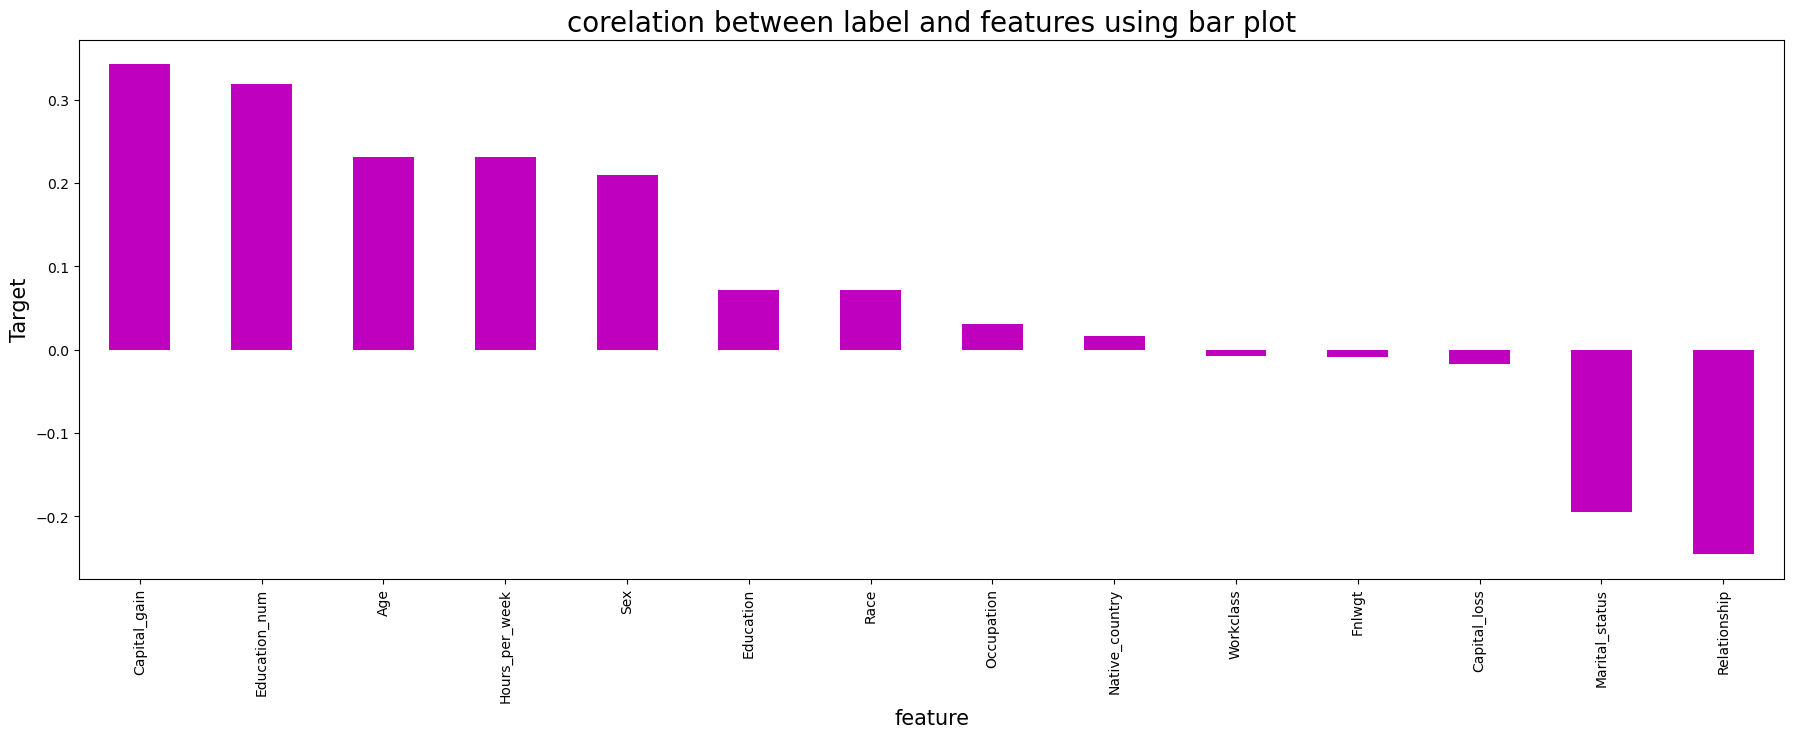

In [53]:
#visualizing the corelation using barplot:
plt.figure(figsize=(22,7))
df1.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("corelation between label and features using bar plot",fontsize=20)
plt.show()


## Variance Inflation Factor( Checking for Multicolinearity)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,9.005923,Age
1,8.451973,Workclass
2,4.609238,Fnlwgt
3,9.238074,Education
4,21.238771,Education_num
5,4.177363,Marital_status
6,3.354391,Occupation
7,2.735205,Relationship
8,18.002334,Race
9,4.404161,Sex


### Comments:
-> some of the columns "Race", "Education_num","Hours_per_week","Native_Country" are creating higher multicolinearity.. so we have to drop some of the column
-> Here we will use PCA method to select principal component which contribute more towards the accurate prediction.. so that multi colinearity will be avoided

In [55]:
#separating target variable and input variable

x=df1.drop('Income',axis=1)
y=df1['Income']

In [56]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0


#### Scaling the input variables:

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.859134,1.732370,-1.077134,-0.339463,1.190127,-0.411550,-0.780889,-0.918479,0.393701,0.716134,-0.244649,-0.036921,-2.404148,0.255718
1,-0.022463,-0.078688,0.322764,0.177032,-0.438231,-1.730000,-0.279103,-0.297193,0.393701,0.716134,-0.244649,-0.036921,0.012374,0.255718
2,1.079533,-0.078688,0.524547,-2.405444,-1.252411,-0.411550,-0.279103,-0.918479,-1.957813,0.716134,-0.244649,-0.036921,0.012374,0.255718
3,-0.757127,-0.078688,1.621404,-0.339463,1.190127,-0.411550,0.724467,2.187951,-1.957813,-1.396387,-0.244649,-0.036921,0.012374,-5.443072
4,-0.095930,-0.078688,1.051999,0.435280,1.597217,-0.411550,-0.780889,2.187951,0.393701,-1.396387,-0.244649,-0.036921,0.012374,0.255718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29904,-0.830594,-0.078688,0.763419,-0.855958,0.783037,-0.411550,1.477145,2.187951,0.393701,-1.396387,-0.244649,-0.036921,-0.166628,0.255718
29905,0.124470,-0.078688,-0.325398,0.177032,-0.438231,-0.411550,-0.028211,-0.918479,0.393701,0.716134,-0.244649,-0.036921,0.012374,0.255718
29906,1.446865,-0.078688,-0.351464,0.177032,-0.438231,2.225349,-1.533567,1.566665,0.393701,-1.396387,-0.244649,-0.036921,0.012374,0.255718
29907,-1.197926,-0.078688,0.173015,0.177032,-0.438231,0.906900,-1.533567,0.945379,0.393701,0.716134,-0.244649,-0.036921,-1.777642,0.255718


In [58]:
y.value_counts()

0.0    23243
1.0     6666
Name: Income, dtype: int64

#### Balancing the target variable count:

In [59]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [60]:
# to balance the target variable data over sampling is performed:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [61]:
y1.value_counts()

0.0    23243
1.0    23243
Name: Income, dtype: int64

#### Selecting the Principal components :

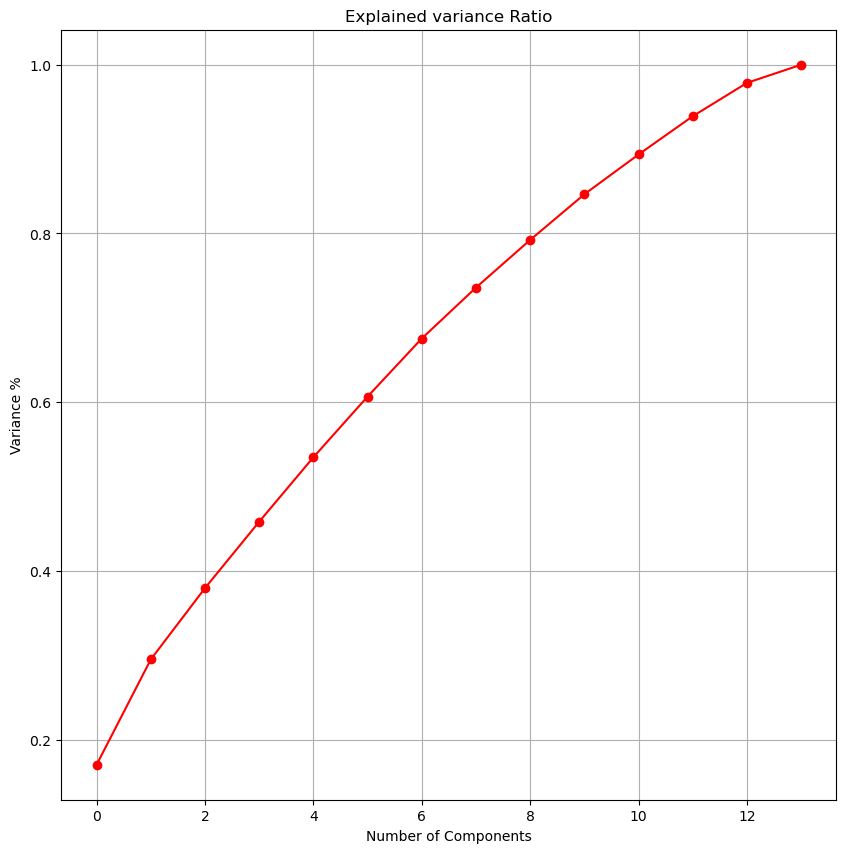

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(x1)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [63]:
pca_new = PCA(n_components=12)
x_new = pca_new.fit_transform(x1)

In [64]:
x_new=pd.DataFrame(x_new,columns=np.arange(12))

## Modelling:

from the target variable we can observe that the given problem statement iS a binary classification problem (<=50k is taken as 0 and >50 k is considered as 1).. so we can apply Naive Bayes classifier, logistic regression knn descission tree.. 

In [65]:
#finding the best random state:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y1,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("maximum acc_score is",maxAcc, "on random_state",maxRs)        

maximum acc_score is 0.7766305283083806 on random_state 90


In [67]:
# creating train test split:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=maxRs)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34864, 14)
(34864,)
(11622, 14)
(11622,)


In [68]:
#Logistic regression model:
logR=LogisticRegression()
logR.fit(x_train,y_train)
pred_train=logR.predict(x_train)
pred_Lgr=logR.predict(x_test)
print("predicted accuracy",accuracy_score(y_test,pred_Lgr))
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_Lgr))
print(classification_report(y_test,pred_Lgr))


predicted accuracy 0.7768026157287903
accuracy score of original y_test data 0.7628212482790271
[[4437 1388]
 [1206 4591]]
              precision    recall  f1-score   support

         0.0       0.79      0.76      0.77      5825
         1.0       0.77      0.79      0.78      5797

    accuracy                           0.78     11622
   macro avg       0.78      0.78      0.78     11622
weighted avg       0.78      0.78      0.78     11622



In [69]:
#DecissionTreeClassifier:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score of original y_test data 1.0
0.8590604026845637
[[4998  827]
 [ 811 4986]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      5825
         1.0       0.86      0.86      0.86      5797

    accuracy                           0.86     11622
   macro avg       0.86      0.86      0.86     11622
weighted avg       0.86      0.86      0.86     11622



In [70]:
#RandomForestClassifier:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))


0.9069867492686284
[[5204  621]
 [ 460 5337]]
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      5825
         1.0       0.90      0.92      0.91      5797

    accuracy                           0.91     11622
   macro avg       0.91      0.91      0.91     11622
weighted avg       0.91      0.91      0.91     11622



In [71]:
#KNeighborsClassifier:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))


0.8662020306315609
[[4591 1234]
 [ 321 5476]]
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86      5825
         1.0       0.82      0.94      0.88      5797

    accuracy                           0.87     11622
   macro avg       0.88      0.87      0.87     11622
weighted avg       0.88      0.87      0.87     11622



In [72]:
#GaussianNB:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))


0.7846325933574255
[[4203 1622]
 [ 881 4916]]
              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77      5825
         1.0       0.75      0.85      0.80      5797

    accuracy                           0.78     11622
   macro avg       0.79      0.78      0.78     11622
weighted avg       0.79      0.78      0.78     11622



## Cross Validating the Models:

In [73]:
# cross validation of the model:
from sklearn.model_selection import cross_val_score

In [74]:
score_LR=cross_val_score(logR,x_new,y1)           #cross validation score of logistic regression
print(score_LR)
print(score_LR.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_Lgr)-(score_LR.mean()))

[0.75822758 0.7654082  0.77121652 0.76809724 0.76605357]
0.7658006189614752
diff b/w accuracy score and cross validation score is: 0.011001996767315059


In [75]:
score_dtc=cross_val_score(dtc,x_new,y1)           #cross validation score of dtc
print(score_dtc)
print(score_dtc.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_dtc)-(score_dtc.mean()))

[0.81920843 0.82607293 0.83543078 0.83811982 0.84263741]
0.8322938752623014
diff b/w accuracy score and cross validation score is: 0.026766527422262376


In [76]:
score_RFC=cross_val_score(RFC,x_new,y1)                           #cross validation score of RandomForest
print(score_RFC)
print(score_RFC.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_RFC)-(score_RFC.mean()))

[0.87599484 0.88512423 0.89652576 0.89631064 0.89706357]
0.890203807790952
diff b/w accuracy score and cross validation score is: 0.01678294147767645


In [77]:
score_knn=cross_val_score(knn,x_new,y1)                           #cross validation score of knn
print(score_knn)
print(score_knn.mean())
print("diff b/w acscuracy score and cross validation score is:",accuracy_score(y_test,pred_knn)-(score_knn.mean()))

[0.84523553 0.84876842 0.86576315 0.8597397  0.86694633]
0.8572906263195759
diff b/w acscuracy score and cross validation score is: 0.008911404311985005


In [78]:
score_gnb=cross_val_score(gnb,x_new,y1)                           #cross validation score of GaussianNB
print(score_gnb)
print(score_gnb.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_gnb)-(score_gnb.mean()))

[0.68670682 0.70538884 0.71291815 0.69872002 0.70947618]
0.7026419983474524
diff b/w accuracy score and cross validation score is: 0.08199059500997308


##### By varifyig the cross validation score and the accuracy score we can conclude that Random Forest model is the model giving  better accuracy

## Hyper Parameter Tuning:

In [79]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]})

In [80]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 60}

In [81]:
MODEL_INCOME=RandomForestClassifier(bootstrap= True,criterion= 'gini',max_depth= 40,max_features= 'auto',n_estimators= 60)

# Final Model

In [82]:
MODEL_INCOME.fit(x_train,y_train)
pred=MODEL_INCOME.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.55240061951471


#### In Final Model we are getting 90.55% accuracy

In [83]:
import joblib
joblib.dump(MODEL_INCOME,'Census Income analysis')


['Census Income analysis']

In [84]:
RFC_CENSUS_INCOME=joblib.load('Census Income Analysis')
predictionM=RFC_CENSUS_INCOME.predict(x_test)
predictionM

array([1., 1., 0., ..., 0., 0., 1.])

In [85]:
a=np.array(y_test)
DF_CENSUS=pd.DataFrame()
DF_CENSUS['predicted']=predictionM
DF_CENSUS['original']=a
DF_CENSUS

,predicted,original
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
11617,0.0,0.0
11618,1.0,1.0
11619,0.0,0.0
11620,0.0,0.0
